# Ejercicio 1

Dibujar la respuesta temporal del sistema de la figura siguiente para una entrada escalón unidad para los valores de ganancia
$$K=1,2,3$$
Nota: las tres respuestas deben dibujarse en la misma gráfica

<img src="Screenshot_1.png">


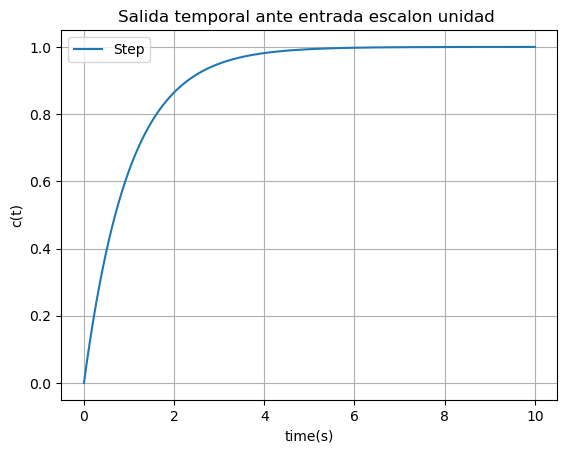

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import control as ct
t = np.linspace(0, 10, 1000)
G = ct.tf([1], [1, 1])
t1, G1 = ct.step_response(G, t)
plt.plot(t1, G1)
plt.legend(['Step'])
plt.ylabel('c(t)')
plt.xlabel('time(s)')
plt.title('Salida temporal ante entrada escalon unidad ')
plt.grid()
plt.show()

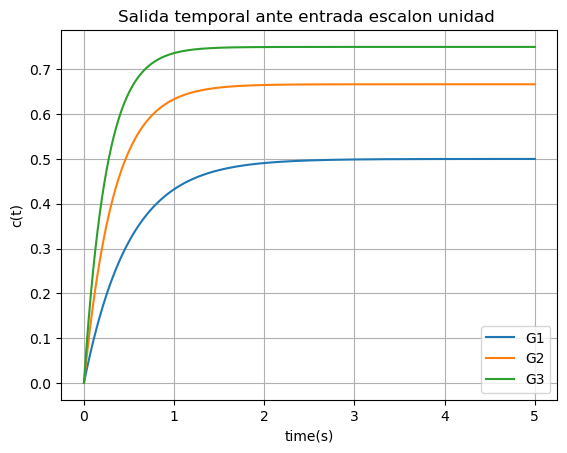

In [2]:
G_1=ct.tf([1],[1, 1+1])
G_2=ct.tf([2],[1, 1+2])
G_3=ct.tf([3],[1, 1+3])

t = np.linspace(0, 5, 1000)

t1, G1 = ct.step_response(G_1, t)
t1, G2 = ct.step_response(G_2, t)
t1, G3 = ct.step_response(G_3, t)

plt.plot(t1, G1)
plt.plot(t1, G2)
plt.plot(t1, G3)
plt.legend(['G1','G2','G3'])
plt.ylabel('c(t)')
plt.xlabel('time(s)')
plt.title('Salida temporal ante entrada escalon unidad ')
plt.grid()
plt.show()




In [3]:
print('G1(s)=',G_3)

G1(s)= 
  3
-----
s + 4



# Ejercicio 2


Dibujar la respuesta temporal del sistema de la siguiente figura para una entrada escalón unidad y valores de $K = 10, 50, 100$.

Calcular el valor de $K$ que consigue que el sistema sea críticamente amortiguado.


<img src="Screenshot_2.png">

críticamente amortiguado -> $\zeta=1$

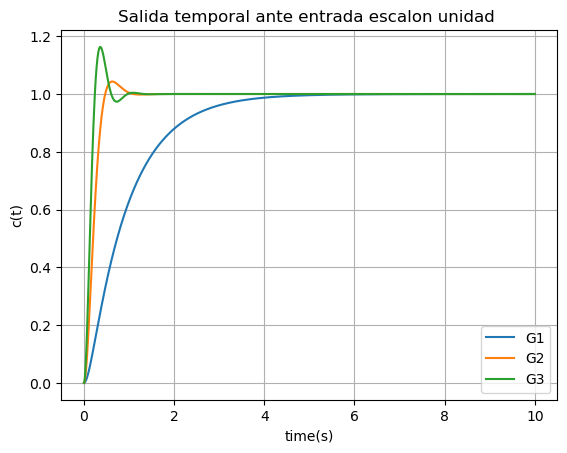

In [4]:
k1,k2,k3=(10,50,100)

G_1=ct.tf([k1],[1, 10, k1])
G_2=ct.tf([k2],[1, 10, k2])
G_3=ct.tf([k3],[1, 10, k3])

t = np.linspace(0, 10, 1000)

t1, G1 = ct.step_response(G_1, t)
t1, G2 = ct.step_response(G_2, t)
t1, G3 = ct.step_response(G_3, t)

plt.plot(t1, G1)
plt.plot(t1, G2)
plt.plot(t1, G3)
plt.legend(['G1','G2','G3'])
plt.ylabel('c(t)')
plt.xlabel('time(s)')
plt.title('Salida temporal ante entrada escalon unidad ')
plt.grid()

plt.show()

Si $\zeta=1$ entonces $\omega=5$ y $K=\omega^2=25$

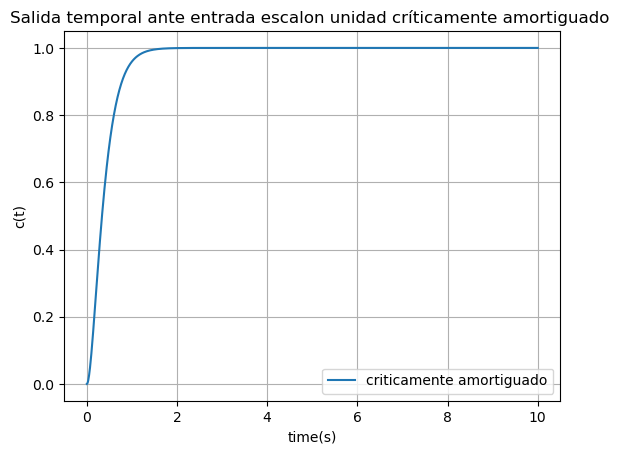

In [5]:
G=ct.tf([25],[1, 10, 25])

t = np.linspace(0, 10, 1000)

t1, Gca = ct.step_response(G, t)

plt.plot(t1, Gca)
plt.legend(['criticamente amortiguado'])
plt.ylabel('c(t)')
plt.xlabel('time(s)')
plt.title('Salida temporal ante entrada escalon unidad críticamente amortiguado ')
plt.grid()
plt.show()

# Ejerrcicio 3
Obtener el tiempo de crecimiento y el sobreimpulso del sistema de la siguiente figura, aplicando las formulas correspondientes y
también de forma gráfica.


<img src="Screenshot_3.png">

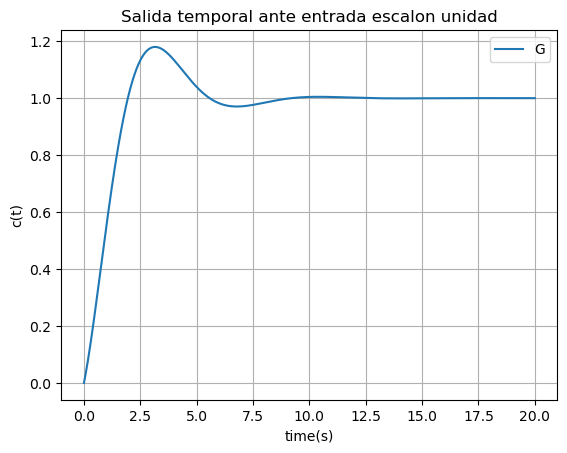

In [6]:
G=ct.tf([0.4, 1],[1, 1, 1])

t = np.linspace(0, 20, 1000)

t1, G1 = ct.step_response(G, t)

plt.plot(t1, G1)
plt.legend(['G'])
plt.ylabel('c(t)')
plt.xlabel('time(s)')
plt.title('Salida temporal ante entrada escalon unidad')
plt.grid()
plt.show()

In [7]:
import bisect
Gca[bisect.bisect_left(G1, 1.000)]
print('t_r = ', round(t1[bisect.bisect_left(G1, 1.000)],3), 's')

t_r =  1.962 s


In [8]:
Mp = (max(G1)-G1[-1])/G1[-1]

print('El máximo de sobreimpulso es M_p = ', 100*round(Mp,23), '%')

El máximo de sobreimpulso es M_p =  17.993853045766656 %


# Ejercicio 4.
Dado el sistema siguiente:

<img src="Screenshot_4.png">

a) Calcular el valor de $K$ para que el sobreimpulso sea del 5%. ¿Cuál es el error en régimen permanente para dicha $K$?

b) Calcular el valor de $K$ que consigue la mitad del error del apartado anterior. ¿Cuál es el valor de sobreimpulso para esa nueva $K$.

Nota: Los cálculos se realizarán aplicando las formulas.



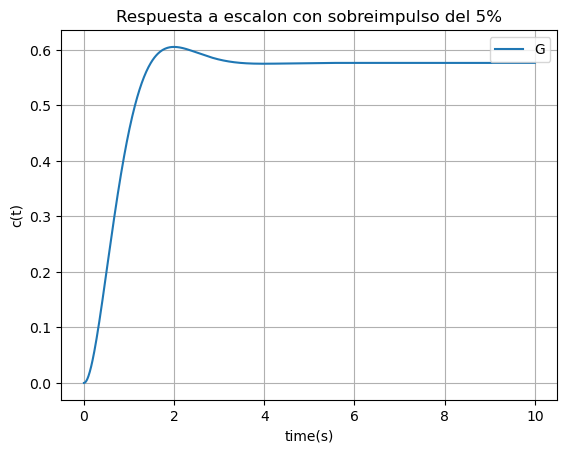

El sobreimpulso es M_p =  5.0 %
K =  2.725


In [9]:
Mp=0.
k=2.5
while Mp<0.05:
    k+=0.0005
    G=ct.tf([k],[1, 3, k+2])
    t = np.linspace(0, 10, 1000)
    t1, G1 = ct.step_response(G, t)
    Mp = (max(G1)-G1[-1])/G1[-1]
    
    
plt.plot(t1, G1)
plt.legend(['G'])
plt.ylabel('c(t)')
plt.xlabel('time(s)')
plt.title('Respuesta a escalon con sobreimpulso del 5%')
plt.grid()
plt.show()



print('El sobreimpulso es M_p = ', 100*round(Mp,3), '%')
print('K = ', round(k,3))

El error estacionario ante la entrada escalon, error de posición, es
$$ e_{p_\infty}= \dfrac{1}{1 + \lim_{s\rightarrow 0}G(s)H(s)} $$

Siendo $H=1$ y $G(s)=\dfrac{K}{(s+1)(s+2)}$, por lo que $e_{p_\infty}=\dfrac{1}{1+\frac{K}{3}}=0.524$

In [10]:
error_pos=1/(1+k/3)
print(error_pos)
print(error_pos/2)
k2 =3*(2/error_pos-1)
k2

0.5240174672489014
0.2620087336244507


8.45000000000015

Para que el error sea la mitad solo debemos despejar $K$ de la ecuacion anterior, quedando $\dfrac{1}{1+\frac{K}{3}}=0.262$ $\Longrightarrow$ $K=8.45$

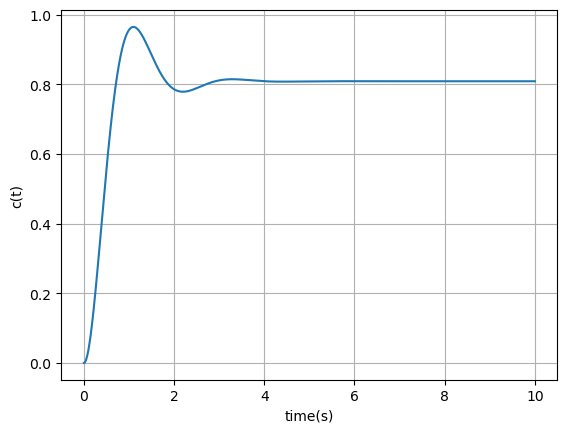

El nuevo sobreimpulso es M_p =  19.287 %


In [11]:
G_2=ct.tf([k2],[1, 3, k2+2])
t = np.linspace(0, 10, 1000)
t1, G2 = ct.step_response(G_2, t)
Mp = (max(G2)-G2[-1])/G2[-1]
    
    
plt.plot(t1, G2)
plt.ylabel('c(t)')
plt.xlabel('time(s)')
plt.grid()
plt.show()



print('El nuevo sobreimpulso es M_p = ', round(100*Mp,3), '%')

# Ejercicio 5
Del diagrama de bloques del siguiente sistema:
<img src="Screenshot_5.png">

a) Obtener la función de tranferencia que relaciona la salida $C_{(s)}$ con la referencia $R_{(s)}$.

b) Obtener la función de transferencia que relaciona la salida $C_{(s)}$ con la perturbación $N_{(s)}$.

c) Calcular el error ante referencia escalón unidad y perturbación nula. ¿Se puede anular el error con las ganancias?

d) Calcular el error ante perturbación escalón unidad y referencia nula. ¿Se puede anular el error con las ganancias?


Simplificamos el sistema de bloques para poder obtener la función $G$ que relaciona $C$ y $R$, siendo $C(s)=G(s)\cdot R(s)$.
<img src="5A.png">

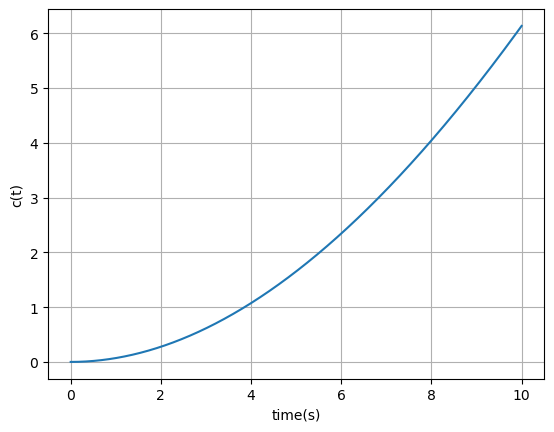

In [15]:
k1,k2,k3,k4=1,2,3,4
N=1

G=ct.tf([k1*k2+N*k1],[(k2+N)*(k3+k4), 1, 0])
t = np.linspace(0, 10, 1000)
t1, G2 = ct.step_response(G, t)
Mp = (max(G2)-G2[-1])/G2[-1]
    
    
plt.plot(t1, G2)
plt.ylabel('c(t)')
plt.xlabel('time(s)')
plt.grid()
plt.show()

